## Assignment: Fashion MNIST
Now it is your turn! You are going to use the same methods presented in the previous video in order to classify clothes from a black and white dataset of images (image by Zalando, MIT License):
![](https://tensorflow.org/images/fashion-mnist-sprite.png)

The class labels are:
```
0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot
```

### 1. Preparing the input data
Let's first import the dataset. It is available on [tensorflow.keras.datasets](https://keras.io/datasets/):

In [12]:
import tensorflow
fashion_mnist = tensorflow.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [13]:
print("Shape of the training set: {}".format(X_train.shape))
print("Shape of the test set: {}".format(X_test.shape))

Shape of the training set: (60000, 28, 28)
Shape of the test set: (10000, 28, 28)


In [14]:
# TODO: Normalize the training and testing set using standardization
def normalize(x,m,s):
    result = x - m
    result = result / s

    return result

train_mean = X_train.mean()
train_std = X_train.std()

X_train = normalize(X_train, train_mean, train_std)
X_test = normalize(X_test, train_mean, train_std)


In [15]:
print(f'Training Mean after standardization {X_train.mean():.3f}')
print(f'Training Std after standardization {X_train.std():.3f}')
print(f'Test Mean after standardization {X_test.mean():.3f}')
print(f'Test Std after standardization {X_test.std():.3f}')

Training Mean after standardization -0.000
Training Std after standardization 1.000
Test Mean after standardization 0.002
Test Std after standardization 0.998


### 2. Training with fully connected layers

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential([
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=2, validation_data=(X_test, y_test))

Epoch 1/2
1875/1875 [==============================] - 8s 3ms/step - loss: 0.4530 - accuracy: 0.8357 - val_loss: 0.3910 - val_accuracy: 0.8588
Epoch 2/2
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3487 - accuracy: 0.8716 - val_loss: 0.3926 - val_accuracy: 0.8549


### 3. Extending to CNNs
Now your goal is to develop an architecture that can reach a test accuracy higher than 0.85.

In [18]:
X_test.shape

(10000, 28, 28)

In [20]:
X_train.shape

(60000, 28, 28, 1)

In [19]:
# TODO: Reshape the dataset in order to add the channel dimension
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [21]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

model = Sequential([
                    Flatten(input_shape=(28, 28)),
                    Dense(400, activation='relu'),
                    Dense(10, activation='softmax')
])

model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 400)               314000    
                                                                 
 dense_3 (Dense)             (None, 10)                4010      
                                                                 
Total params: 318010 (1.21 MB)
Trainable params: 318010 (1.21 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/15
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4540 - accuracy: 0.8362 - val_loss: 0.3971 - val_accuracy: 0.8563
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3472 - accuracy: 0.8728 - val_loss: 0.3786 - val_accuracy: 0

### 4. Visualizing Predictions

1/1 [==============================] - 0s 151ms/step


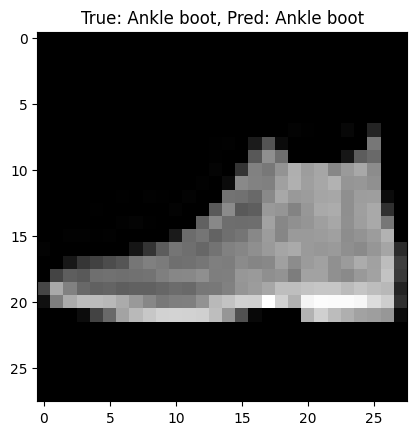

1/1 [==============================] - 0s 80ms/step


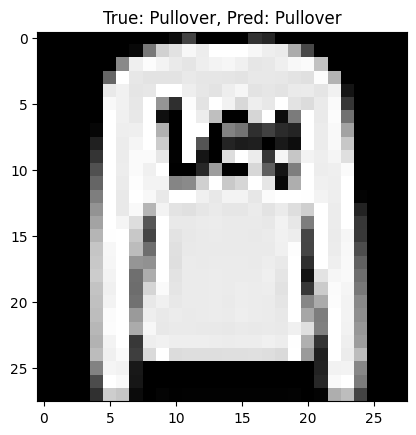

1/1 [==============================] - 0s 56ms/step


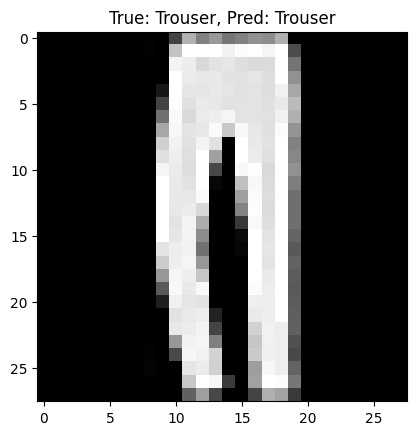

1/1 [==============================] - 0s 59ms/step


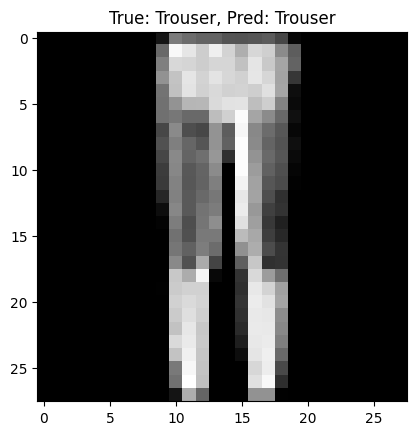

1/1 [==============================] - 0s 31ms/step


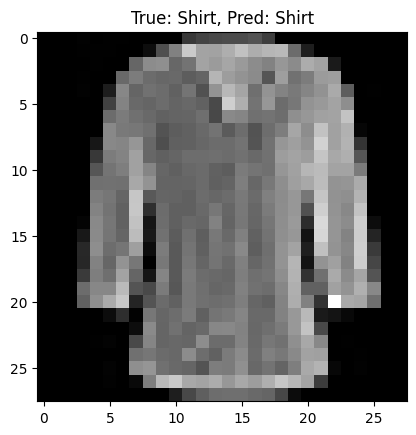

In [22]:
import numpy as np
import matplotlib.pyplot as plt

label_names = {0:"T-shirt/top",
               1:"Trouser",
               2:"Pullover",
               3:"Dress",
               4:"Coat",
               5:"Sandal",
               6:"Shirt",
               7:"Sneaker",
               8:"Bag",
               9:"Ankle boot"}

# Index to be visualized
for idx in range(5):
    plt.imshow(X_test[idx].reshape(28,28), cmap='gray')
    out = model.predict(X_test[idx].reshape(1,28,28,1))
    plt.title("True: {}, Pred: {}".format(label_names[y_test[idx]], label_names[np.argmax(out)]))
    plt.show()